In [1]:
import numpy as np
import pandas as pd

In [2]:
train_seq = pd.read_csv('c:\\Users\\ANUSHKA SINGH\\Desktop\\cs771\\mini-project\\mini-project-1\\datasets\\train\\train_text_seq.csv')
valid_seq = pd.read_csv('c:\\Users\\ANUSHKA SINGH\\Desktop\\cs771\\mini-project\\mini-project-1\\datasets\\valid\\valid_text_seq.csv')
test_seq = pd.read_csv('c:\\Users\\ANUSHKA SINGH\\Desktop\\cs771\\mini-project\\mini-project-1\\datasets\\test\\test_text_seq.csv')

In [3]:
print(train_seq)


                                              input_str  label
0     0000154364642718159661428002624223132284159626...      0
1     0004641596369515436422262614110471596262476161...      0
2     0001543626215965999614422464135806142624051159...      0
3     0000154364224641238614262159689561596284351061...      1
4     0004641899422154362069015966142624761262159661...      1
...                                                 ...    ...
7075  0000026267027181596614464154364222842626141596...      1
7076  0000464422155826261433491543615961596284614390...      1
7077  0003069915964309154366142624644222841795262614...      1
7078  0000614159615436198346426242237758262159694061...      0
7079  0000154366144221596464476126219231596614189926...      0

[7080 rows x 2 columns]


In [4]:
train_seq.shape


(7080, 2)

In [5]:
valid_seq.shape

(489, 2)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# Initialize the CountVectorizer to convert text sequences into feature vectors
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 5))

# Prepare train and validation data
X_train = vectorizer.fit_transform(train_seq['input_str'])
y_train = train_seq['label']

X_valid = vectorizer.transform(valid_seq['input_str'])
y_valid = valid_seq['label']

# Show the shape of the transformed data
X_train.shape, X_valid.shape


((7080, 15029), (489, 15029))

#### MODELS TRAINED BELOW
#### 1)LOGISTIC REGRESSION
#### 2)RANDOM FOREST
### 3)MLP


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Initialize the models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
mlp_clf.fit(X_train, y_train)

# Evaluate the models on the validation set
log_reg_pred = log_reg.predict(X_valid)
rf_clf_pred = rf_clf.predict(X_valid)
mlp_clf_pred = mlp_clf.predict(X_valid)

# Calculate accuracy for each model
log_reg_acc = accuracy_score(y_valid, log_reg_pred)
rf_clf_acc = accuracy_score(y_valid, rf_clf_pred)
mlp_clf_acc = accuracy_score(y_valid, mlp_clf_pred)

log_reg_acc, rf_clf_acc, mlp_clf_acc


(0.6687116564417178, 0.5991820040899796, 0.6319018404907976)

### PERFORMANCE METRICS

In [8]:
#confusion matrix
import matplotlib as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

def plot_confusion_matrix(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=cmap)
    plt.pyplot.show()

def get_classification_report(y_true, y_pred):
    return classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'])

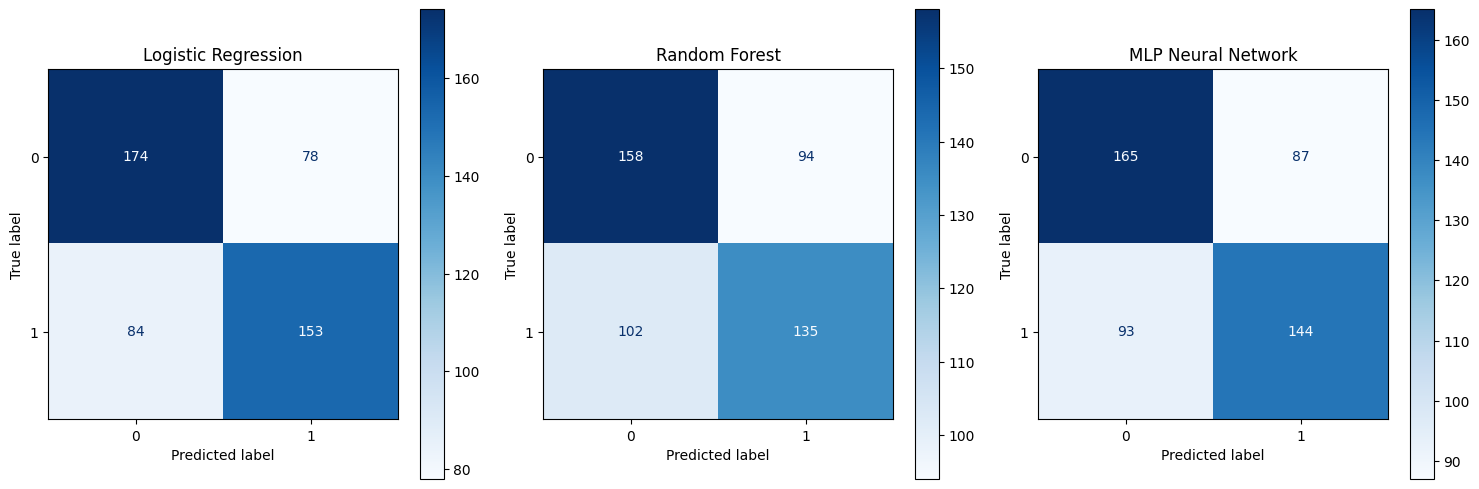

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

log_reg_cm = confusion_matrix(y_valid, log_reg_pred)
rf_cm = confusion_matrix(y_valid, rf_clf_pred)
mlp_cm = confusion_matrix(y_valid, mlp_clf_pred)

# Plot confusion matrices for each model
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Logistic Regression Confusion Matrix
ConfusionMatrixDisplay(log_reg_cm).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression')

# Random Forest Confusion Matrix
ConfusionMatrixDisplay(rf_cm).plot(ax=axes[1], cmap='Blues')
axes[1].set_title('Random Forest')

# MLP (Neural Network) Confusion Matrix
ConfusionMatrixDisplay(mlp_cm).plot(ax=axes[2], cmap='Blues')
axes[2].set_title('MLP Neural Network')

plt.tight_layout()
plt.show()